In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
df2 = pd.read_csv('dataset2.csv',header = None)

In [3]:
%matplotlib notebook

def plot_samples(X, sample_size):
    fig = plt.figure()
    
    idx = np.random.permutation(X.shape[0])
    X = X[idx]
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:,0][:sample_size], X[:,1][:sample_size], X[:,2][:sample_size])

In [4]:
X2 = np.array(df2)
X2.shape


(14801, 3)

<IPython.core.display.Javascript object>


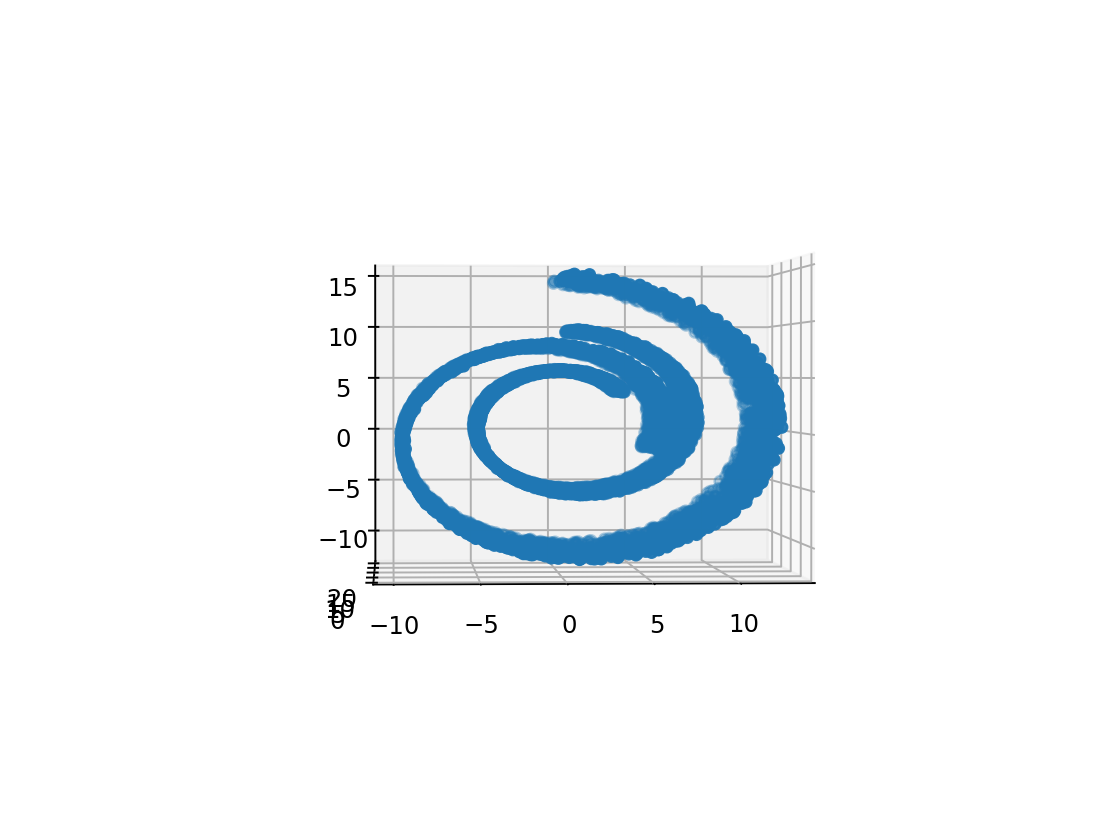

In [5]:
plot_samples(X2,X2.shape[0]//2)

In [19]:
class KMeans:
    def __init__(self, n_clusters, init='random', max_iter = 300, tol =1e4):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.tol = tol
    def _init_centroids(self,init,X):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters
        X= np.array(X)
                
        center_idx = np.random.permutation(n_samples)[:n_clusters]
        centroids = X[center_idx]            
        return centroids
    
    def _kmean_plusplus(self,X):
        centers = []
        n_samples = X.shape[0]
        k1 = np.random.randint(0, n_samples)
        centers.append(k1)
        while len(centers) < self.n_clusters:
            distance = []
            centers_data = X[centers]
            for i in range(X.shape[0]):
                distance.append(np.min(np.square(np.linalg.norm((centers_data - X[i]), axis=1))))
            normalised_distance = distance / np.sum(distance)
            p = np.random.rand()
            cumulative = np.cumsum(normalised_distance).tolist()
            for m in range(n_samples):
                if cumulative[m] >p:
                    centers.append(m)
                    break
                
        return X[centers]
        
    
    def _assign(self,X,centriods):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters       
        dic={}
        
        for i in range(len(centriods)):
            dic[i] =[]
            
        for x in X:
            cur_dis = []
            
            for c in centriods:
                cur_dis.append(np.linalg.norm(x-c))
                
            cur_dis = np.array(cur_dis)
            assign_c = np.argmin(cur_dis)
          
            dic[assign_c].append(x)
            
        return dic
        
    def _updates(self,cluster):
        # list for new centriods
        centriods = []
        for k,v in cluster.items():
            # takes the mean for each cluster
            c = np.mean(v,axis =0)
            centriods.append(c)
            
        centriods = np.array(centriods)
        return centriods
            
    def fit(self,X):
        X = np.array(X)
        n_samples = X.shape[0]
        
        if self.init =='random':
            centriods = self._init_centroids(self.init,X)
        if self.init =='kmean++':
            centriods = self._kmean_plusplus(X)
            
        cur_iter = 1
        # assign points to centorids
        cluster = self._assign(X, centriods)
       
        # update centorids
        centriods_new = self._updates(cluster)
       
        err = np.linalg.norm(centriods-centriods_new)
        while cur_iter < self.max_iter and err>=self.tol:
            if cur_iter % 100 ==0:
                print(err)
            centriods = centriods_new           
            # assign points to centorids
            cluster = self._assign(X,centriods)
            # update centorids
            centriods_new = self._updates(cluster)        
            #compute tol
            err = np.linalg.norm(centriods-centriods_new)
            cur_iter += 1
        return centriods_new
    
    
    
    def compute_cost(self,centorids,dic):
        cost = 0
        total_cost =[]
       
        for centorid,samples in zip(centorids,dic.values()):
            #print(centorid)
            centorid_cost =[]
            for sample in samples:
                sample = np.array(sample)
                sample_cost = np.linalg.norm(sample-centorid)
                centorid_cost.append(sample_cost)
            centorid_cost = np.array(centorid_cost) 
            total_cost.append(np.sum(centorid_cost))
            #print(centorid_cost)
            centorid_cost=[]       
        total_cost = np.array(total_cost)
        return np.sum(total_cost)
    
    def predict(self, X, centorids):
            '''
                X: data
                centriods : centriods
                return 
                    centorids as input
                    cluster as an dictoionary
            '''

            X = np.array(X)
            dic={}

            for i in range(len(centorids)):
                dic[i] =[]            
            for x in X:
                cur_dis = []
                # calculate the minimum distance
                for c in centorids:
                    cur_dis.append(np.linalg.norm(x-c))

                cur_dis = np.array(cur_dis)
                assign_c = np.argmin(cur_dis)

                dic[assign_c].append(x)
            cost =self.compute_cost(centorids,dic)   
            return centorids, dic,cost

In [20]:
KMeans_r = KMeans(n_clusters=2, init='random', max_iter=300, tol= 1e-4)
KMeans_k = KMeans(n_clusters=2, init='kmean++', max_iter=300, tol= 1e-4)

In [21]:
cen_r = KMeans_r.fit(df2)
cen_k = KMeans_k.fit(df2)

In [35]:
_,dicr,_ = KMeans_r.predict(df2,cen_r)
_,dic_kplus,_ = KMeans_k.predict(df2,cen_k)

<IPython.core.display.Javascript object>


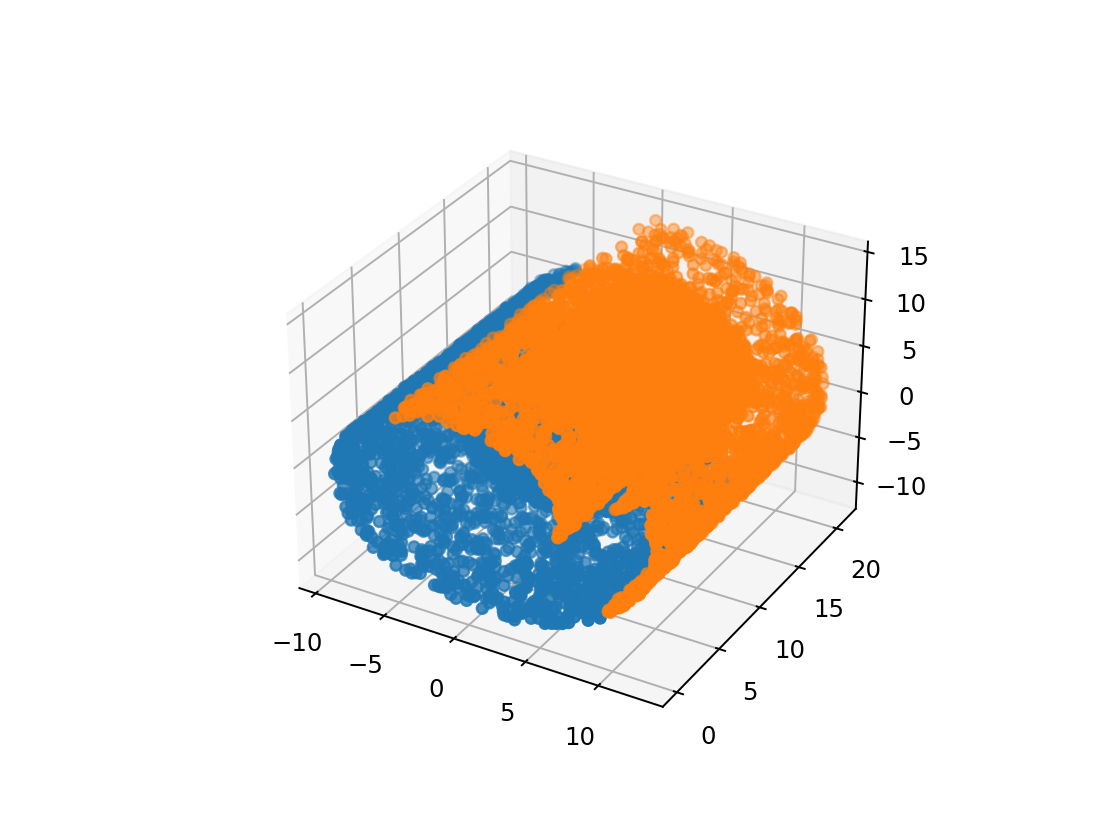

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for vr in dicr.values():    
    vr = np.array(vr)
    ax.scatter3D(vr[:,0], vr[:,1], vr[:,2])
plt.show()

<IPython.core.display.Javascript object>


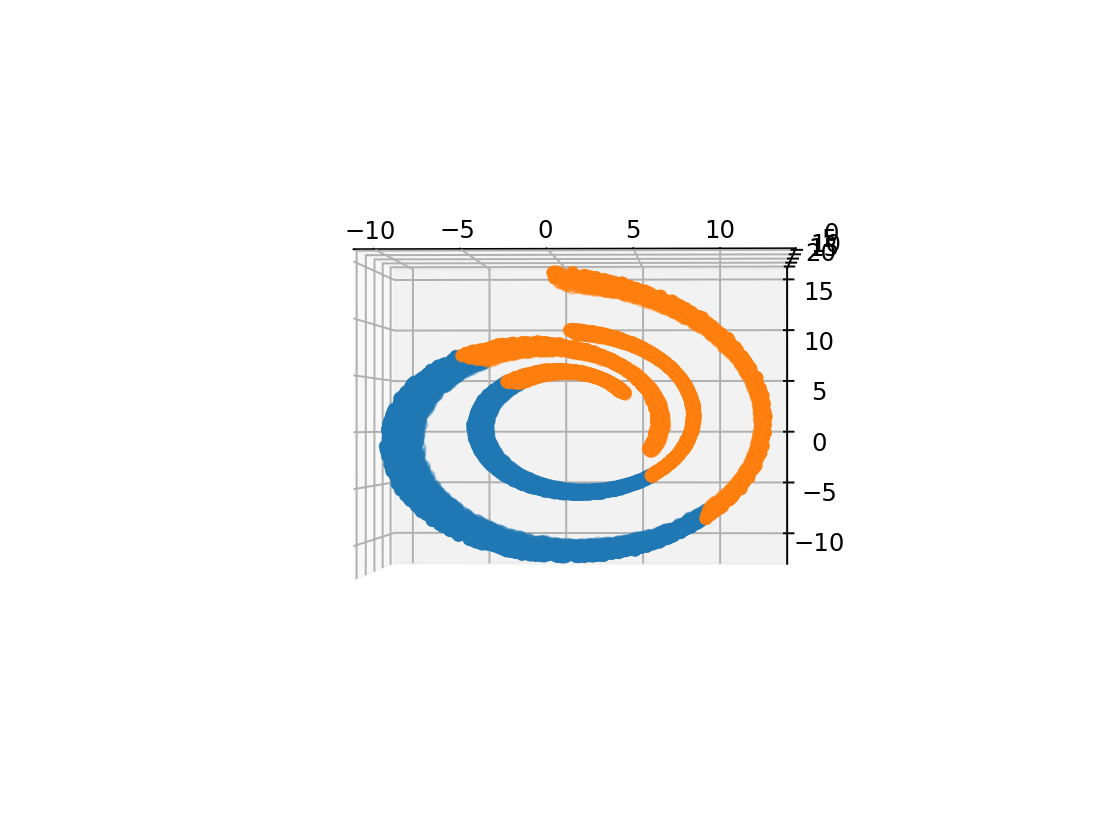

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for vk in dic_kplus.values():
    
    vk = np.array(vk)
    ax.scatter3D(vk[:,0], vk[:,1], vk[:,2])
    
plt.show()
